# Challenge 1:1

In [140]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

mta = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160109.txt',header=0)

In [141]:
mta['key'] = zip(mta['C/A'], mta['UNIT'], mta['SCP'], mta['STATION'])

##dict.setdefault is a better alternative to an if:else for keys in dictionary

mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,key
0,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,03:00:00,REGULAR,5478180,1849152,"(A002, R051, 02-00-00, 59 ST)"
1,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,07:00:00,REGULAR,5478183,1849161,"(A002, R051, 02-00-00, 59 ST)"
2,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,11:00:00,REGULAR,5478262,1849240,"(A002, R051, 02-00-00, 59 ST)"
3,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,15:00:00,REGULAR,5478519,1849340,"(A002, R051, 02-00-00, 59 ST)"
4,A002,R051,02-00-00,59 ST,NQR456,BMT,01/02/2016,19:00:00,REGULAR,5478940,1849403,"(A002, R051, 02-00-00, 59 ST)"


In [142]:
mta.drop(['C/A', 'UNIT', 'SCP'], axis = 1, inplace = True)

In [143]:
mta.head()

,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,key
0,59 ST,NQR456,BMT,01/02/2016,03:00:00,REGULAR,5478180,1849152,"(A002, R051, 02-00-00, 59 ST)"
1,59 ST,NQR456,BMT,01/02/2016,07:00:00,REGULAR,5478183,1849161,"(A002, R051, 02-00-00, 59 ST)"
2,59 ST,NQR456,BMT,01/02/2016,11:00:00,REGULAR,5478262,1849240,"(A002, R051, 02-00-00, 59 ST)"
3,59 ST,NQR456,BMT,01/02/2016,15:00:00,REGULAR,5478519,1849340,"(A002, R051, 02-00-00, 59 ST)"
4,59 ST,NQR456,BMT,01/02/2016,19:00:00,REGULAR,5478940,1849403,"(A002, R051, 02-00-00, 59 ST)"


# Challenge 1:2

In [144]:

time_dict = dict()

for index, row in mta.iterrows():
    key = row['key']
    time = pd.to_datetime(row['DATE'] + row['TIME'], format='%m/%d/%Y%H:%M:%S')
    entries = row['ENTRIES']
    if key in time_dict:
        time_dict[key].append([time,entries])
    else:
        time_dict[key] = [[time, entries]]


In [162]:
station_time_dict = dict()

for index, row in mta.iterrows():
    key = row['STATION']
    time = pd.to_datetime(row['DATE'] + row['TIME'], format='%m/%d/%Y%H:%M:%S')
    entries = row['ENTRIES']
    if key in station_time_dict:
        station_time_dict[key].append([time,entries])
    else:
        station_time_dict[key] = [[time, entries]]
    

In [163]:
len(station_time_dict)

372

In [ ]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1],
                                     rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows)-1)]
                        for turnstile, rows in time_dict.items()}

In [191]:
datetime_count_times.keys()[1][-2]


'00-00-02'

In [187]:
'''
i = 0
stations = dict()
while i < len(datetime_count_times):
    if datetime_count_times.keys()[i][-1] in stations:
        stations[datetime_count_times[i][-1]].append([(datetime_count_times.keys()[i][-2],(max(entry)-min(entry))])
    if datetime_count_times[i][-2]

datetime_count_times.keys()[3424][-2]
        '''

'00-00-00'

In [ ]:
for x in datetime_count_times
    if station_id.keys()[i][-1] not in station:
        station[station_id.keys()[i][-1]] = [station_id.keys()[i][-2], datetime_count_times()]
    

# Challenge 1:3

In [164]:
def entries_per_day_func(my_list):
   ## Get unique values of dates
   dates = [row[0].date() for row in my_list]
   dates = set(dates)
   
   result = []
   for date in dates:
       entries = [x[1] for x in my_list if x[0].date() == date]
       result.append((date, max(entries)-min(entries)))
   return result


In [280]:
station_total = dict()
for key, value in datetime_count_times.items():
    if key[-1] in station_total:
        station_total[key[-1]].append([key[-2], (entries_per_day_func(value))])
    else:
        station_total[key[-1]] = list([key[-2],entries_per_day_func(value)])

In [306]:
station_total.values()[0]
print sum([67,64,59,23,16,63,60])

352


In [ ]:
def time_series_graph(station):
    if len(station) > 1:
        for item in station:
            plt.plot([t for t in item.keys()], [c for c in item.values()])
    else:
        plt.plot([t for t in station.items(), [c for c in station.values())

In [398]:
summed_dict['MARCY AV']

29990

# Challenge 1:4

In [165]:
##a function that takes one subunit of turnstiles at a station
##and plots the weekly entry count

def station_weekly(station_id):
    entries_per_day = entries_per_day_func(station_id)
    dates = []
    entries = []
    for x in sorted(entries_per_day):
        dates.append(x[0])
    for x in sorted(entries_per_day):
        entries.append(x[-1])
    
    print zip(dates,entries)
    plt.figure(figsize=(10,5))
    plt.plot(dates,entries)

[(datetime.date(2016, 1, 2), 563), (datetime.date(2016, 1, 3), 423), (datetime.date(2016, 1, 4), 837), (datetime.date(2016, 1, 5), 819), (datetime.date(2016, 1, 6), 926), (datetime.date(2016, 1, 7), 983), (datetime.date(2016, 1, 8), 982)]


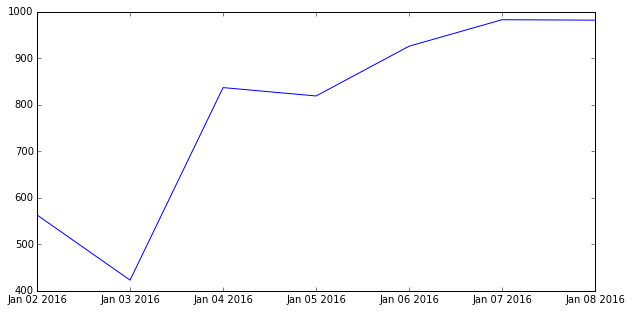

In [168]:
##testing the function out at my home subway stop

station_weekly(datetime_count_times[('J013', 'R380', '00-00-00', 'GATES AV')])

[(datetime.date(2016, 1, 2), 206), (datetime.date(2016, 1, 3), 186), (datetime.date(2016, 1, 4), 792), (datetime.date(2016, 1, 5), 705), (datetime.date(2016, 1, 6), 735), (datetime.date(2016, 1, 7), 706), (datetime.date(2016, 1, 8), 557)]


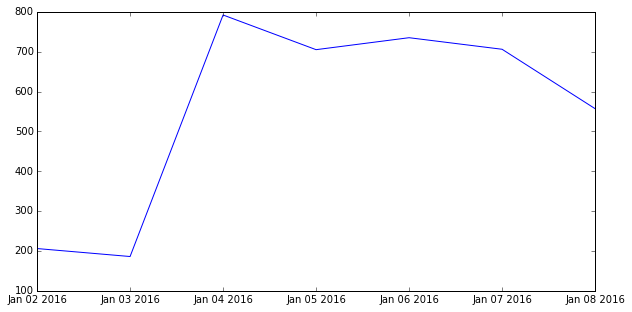

In [401]:
##testing the function at a busy subway station

station_weekly(datetime_count_times[('R143', 'R032', '02-00-00', 'TIMES SQ-42 ST')])

[(datetime.date(2016, 1, 2), 213), (datetime.date(2016, 1, 3), 190), (datetime.date(2016, 1, 4), 355), (datetime.date(2016, 1, 5), 383), (datetime.date(2016, 1, 6), 415), (datetime.date(2016, 1, 7), 397), (datetime.date(2016, 1, 8), 426)]


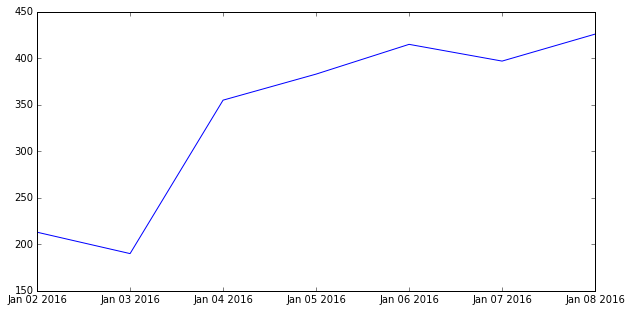

In [402]:
##testing the function at a very lonely station

station_weekly(datetime_count_times[('N122', 'R439', '00-00-00', 'ROCKAWAY AV')])

# Challenge 1:5

In [433]:
##modified version of ozzie's code, removes date from value index

def entries_per_day_func_2(my_list):
   ## Get unique values of dates
   dates = [row[0].date() for row in my_list]
   dates = set(dates)
   
   result = []
   for date in dates:
       entries = [x[1] for x in my_list if x[0].date() == date]
       result.append((date, (max(entries)-min(entries))))
   return result


### should to incorporate dict.setdefault(key, []).append() into this:

station_total1 = dict()
for key, value in datetime_count_times.items():
    if key[-1] in station_total1:
        station_total1[key[-1]].append(entries_per_day_func_2(value) if )
    else:
        station_total1[key[-1]] = [entries_per_day_func_2(value)]


summed_dict = {}
for key, value in station_total1.items():
    summed_dict[key] = (([x for x in value]))
    
station_totals = []
for x, y in summed_dict.items()[:5]:
    print x, y

CYPRESS AV [[(datetime.date(2016, 1, 4), 67), (datetime.date(2016, 1, 5), 64), (datetime.date(2016, 1, 8), 59), (datetime.date(2016, 1, 2), 23), (datetime.date(2016, 1, 3), 16), (datetime.date(2016, 1, 6), 63), (datetime.date(2016, 1, 7), 60)], [(datetime.date(2016, 1, 4), 359), (datetime.date(2016, 1, 5), 342), (datetime.date(2016, 1, 8), 332), (datetime.date(2016, 1, 2), 195), (datetime.date(2016, 1, 3), 128), (datetime.date(2016, 1, 6), 359), (datetime.date(2016, 1, 7), 337)], [(datetime.date(2016, 1, 4), 68), (datetime.date(2016, 1, 5), 59), (datetime.date(2016, 1, 8), 69), (datetime.date(2016, 1, 2), 20), (datetime.date(2016, 1, 3), 17), (datetime.date(2016, 1, 6), 59), (datetime.date(2016, 1, 7), 70)], [(datetime.date(2016, 1, 4), 229), (datetime.date(2016, 1, 5), 246), (datetime.date(2016, 1, 8), 267), (datetime.date(2016, 1, 2), 103), (datetime.date(2016, 1, 3), 97), (datetime.date(2016, 1, 6), 250), (datetime.date(2016, 1, 7), 266)], [(datetime.date(2016, 1, 4), 113), (datetim

In [436]:
station_total1['CANAL ST']

[[(datetime.date(2016, 1, 4), 126),
  (datetime.date(2016, 1, 5), 136),
  (datetime.date(2016, 1, 8), 112),
  (datetime.date(2016, 1, 2), 31),
  (datetime.date(2016, 1, 3), 20),
  (datetime.date(2016, 1, 6), 154),
  (datetime.date(2016, 1, 7), 136)],
 [(datetime.date(2016, 1, 4), 318),
  (datetime.date(2016, 1, 5), 328),
  (datetime.date(2016, 1, 8), 248),
  (datetime.date(2016, 1, 2), 60),
  (datetime.date(2016, 1, 3), 53),
  (datetime.date(2016, 1, 6), 293),
  (datetime.date(2016, 1, 7), 284)],
 [(datetime.date(2016, 1, 4), 447),
  (datetime.date(2016, 1, 5), 466),
  (datetime.date(2016, 1, 8), 480),
  (datetime.date(2016, 1, 2), 191),
  (datetime.date(2016, 1, 3), 133),
  (datetime.date(2016, 1, 6), 449),
  (datetime.date(2016, 1, 7), 502)],
 [(datetime.date(2016, 1, 4), 203),
  (datetime.date(2016, 1, 5), 192),
  (datetime.date(2016, 1, 8), 183),
  (datetime.date(2016, 1, 2), 69),
  (datetime.date(2016, 1, 3), 41),
  (datetime.date(2016, 1, 6), 160),
  (datetime.date(2016, 1, 7), 1

In [511]:
by_station_daily_sum = dict()

for k, v in station_total1.items()[:1]:
    

CYPRESS AV (datetime.date(2016, 1, 7), 251)


In [498]:
by_station_daily_sum

{'CYPRESS AV': 64}

# Challenge 1:6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...]
type of time series for each STATION, by adding up all the turnstiles in a station.

In [407]:
for key, values in time_dict.items()[:5]:
    if key[-1], values[0]

V [Timestamp('2016-01-02 00:00:00'), 794367]
ROCKAWAY BLVD [Timestamp('2016-01-02 00:00:00'), 7142470]
BEACH 60 ST [Timestamp('2016-01-02 03:00:00'), 117440597]
PATH WTC [Timestamp('2016-01-02 01:16:47'), 501970]
GRAND ST [Timestamp('2016-01-02 03:00:00'), 642637]


In [408]:
#modify station_weekly function to feature total counts per day at each station

def entries_per_day_func(my_list):
   ## Get unique values of dates
   dates = [row[0].date() for row in my_list]
   dates = set(dates)
   
   result = []
   for date in dates:
       entries = [x[1] for x in my_list if x[0].date() == date]
       result.append((date, max(entries)-min(entries)))
   return result

def station_weekly_by_station_name(station_name):
    entries_per_day = entries_per_day_func_2(station_id)
    dates = []
    entries = []
    for x in sorted(entries_per_day):
        dates.append(x[0])
    for x in sorted(entries_per_day):
        entries.append(x[-1])
    
    print zip(dates,entries)
    plt.figure(figsize=(10,5))
    plt.plot(dates,entries)

In [412]:
station_list = []
for k, v in summed_dict.items():
    station_list.append((k,v))

In [415]:
len(summed_dict.keys())

372

In [416]:
summed_dict['CANAL ST']

192799